# 1. Data Exploration:

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np

In [3]:
# Step 2: Loading the Data
data = pd.read_excel(r"C:\Users\DEB\Downloads\Processed_Flipdata.xlsx")

# Displaying first few rows
data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [4]:
# Inspecting dataset
print("\nDataFrame Info:")
data.info()

print("\nSummary Statistics:")
data.describe()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB

Summary Statistics:


,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [5]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [6]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_']

Numerical Columns:
['Unnamed: 0', 'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize']


# Key Findings

1. **Dataset Size**: 541 rows and 12 columns  
   **Missing Values**: None

2. **Numerical Features**: Memory, RAM, Battery_, Prize  
   **Categorical Features**: Model, Brand, Colour Family, Rear Camera, Front Camera, Processor_

# 2. Data Preprocessing:

# Univariate Analysis

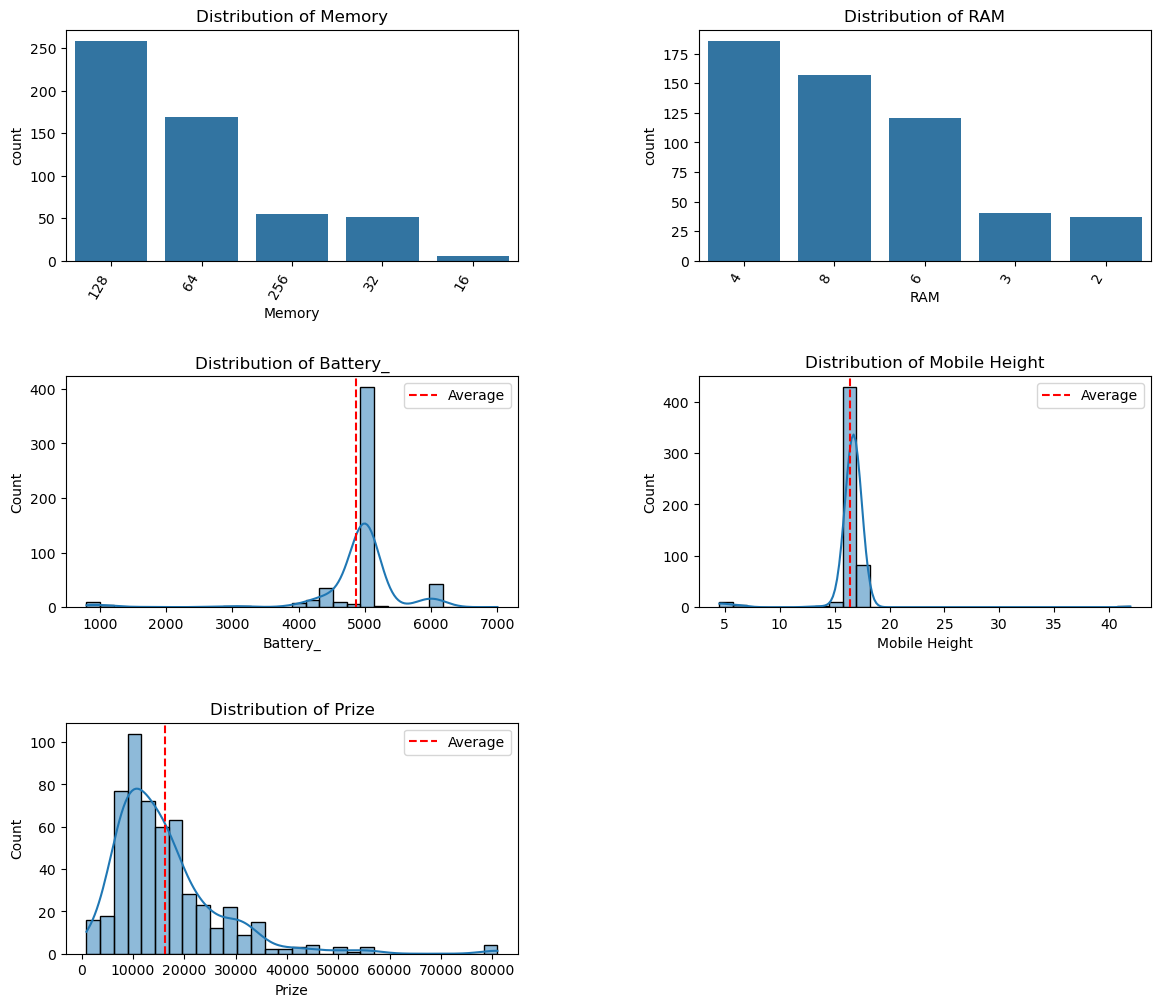

In [10]:
# Visualize feature distributions
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Set up the figure
grid = gridspec.GridSpec(3, 2, hspace=0.5, wspace=0.4)
numeric_features = ['Memory', 'RAM', 'Battery_', 'Mobile Height', 'Prize']
fig = plt.figure(figsize=(14, 12))

# Plot distributions
for idx, feature in enumerate(numeric_features):
    ax = fig.add_subplot(grid[idx])
    
    if feature in ['Mobile Height', 'Prize', 'Battery_']:
        sns.histplot(data[feature], kde=True, bins=30, ax=ax)
        avg_value = data[feature].mean()
        ax.axvline(avg_value, color='red', linestyle='--', label='Average')
        ax.legend()
    else:
        sns.countplot(data=data, x=feature, order=data[feature].value_counts().index, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
    
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Key Findings

1. **Memory and RAM**: Most devices have 128GB or 64  GB of memory, and 4GB or 8GB of RAM.
2. **Battery**: Most phones have batteries around 5000mAh.
3. **Mobile Height**: The majority of devices fall within the 15-17 unit Height Range.
3. **Price**: Most phones cost less than or equal to ₹20,000.00

# Multivariate Analysis

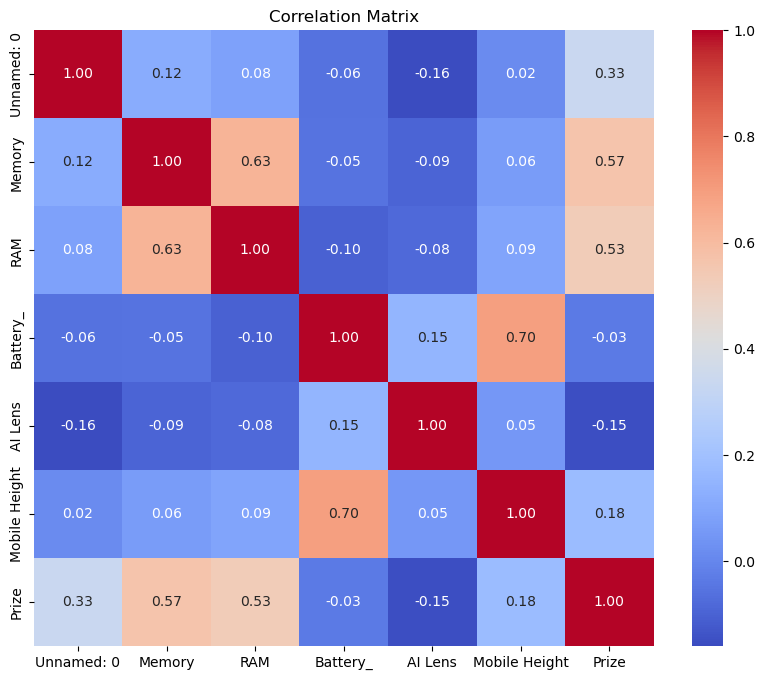

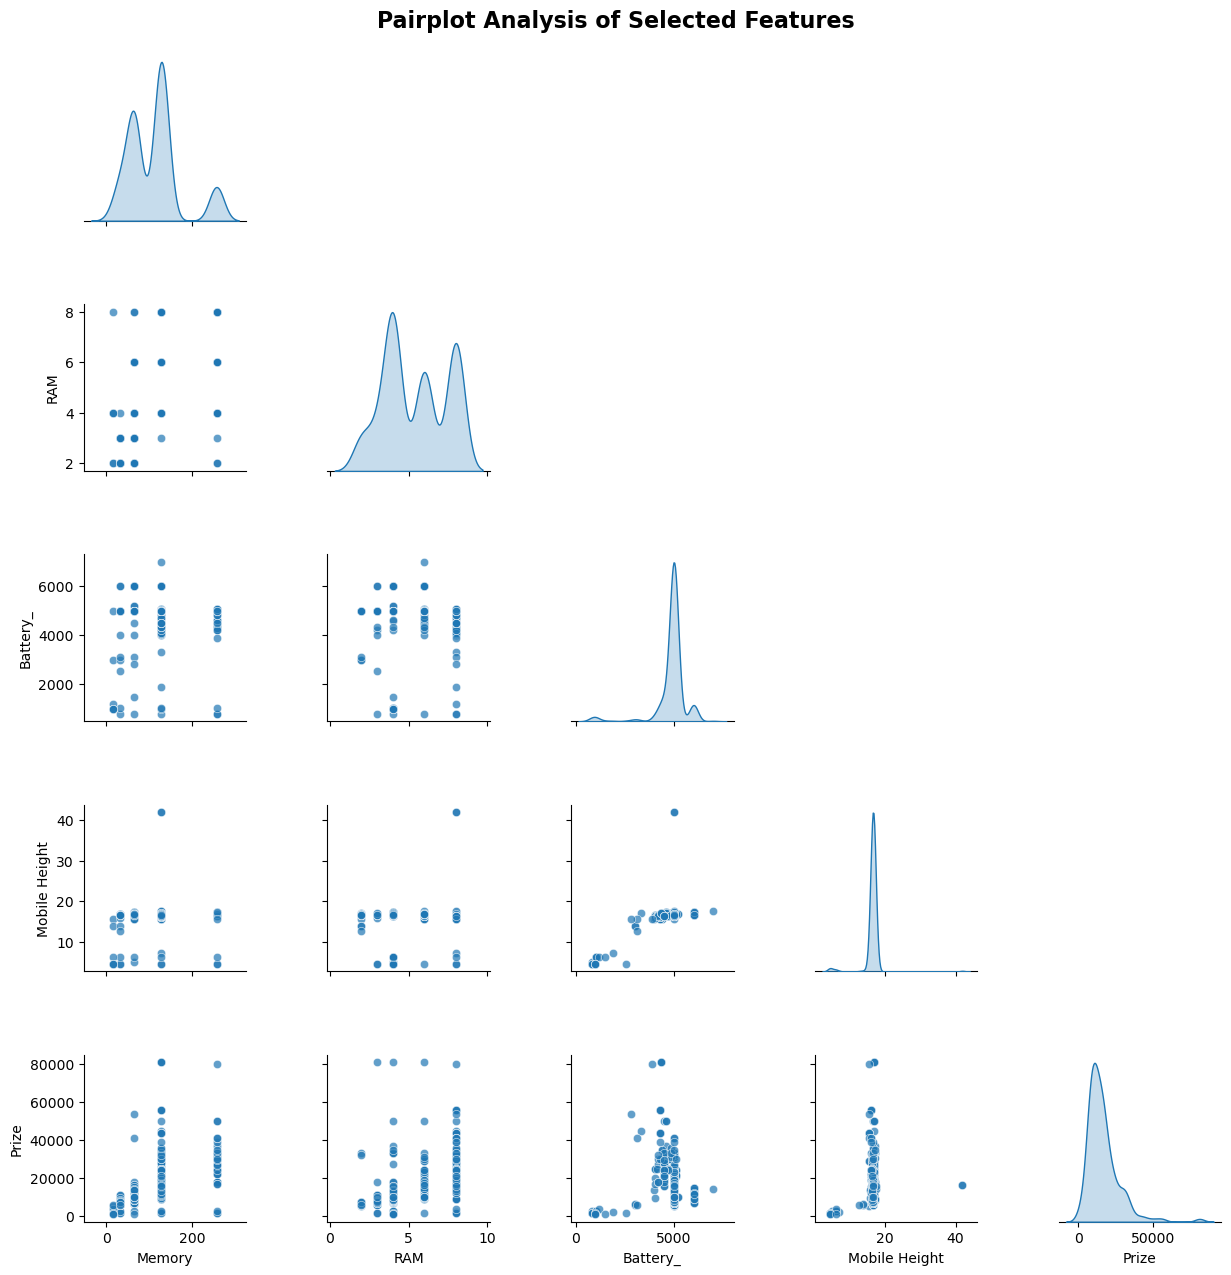

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot analysis for relationships
selected_features = ['Memory', 'RAM', 'Battery_', 'Mobile Height', 'Prize']
sns.pairplot(data[selected_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot Analysis of Selected Features', y=1.02, fontsize=16, fontweight='bold')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

# Key Findings

1. **Memory-RAM**: Moderate positive correlation (0.63) - as Memory increases, RAM tends to increase.

2. **Battery-Mobile Height**: Moderately strong positive correlation (0.70) - higher Battery capacity is associated with increased Mobile Height.

3. **AI Lens-Prize**: Weak negative correlation (-0.15) - higher AI Lens feature is linked to slightly lower device Prices.

4. **Other Correlations**: Ranging from weak to moderate, both positive and negative, for features like Memory-Price, RAM-Price, etc.

In [15]:
# Dropping the 'Unnamed: 0' Column
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [16]:
# Unique models and colors
unique_mdl = data['Model'].unique()
unique_clr = data['Colour'].unique()

# Create a DataFrame from the unique values
unique_df = pd.DataFrame({
    'Unique Models': pd.Series(unique_mdl),
    'Unique Colours': pd.Series(unique_clr)
})

# Calculate total unique counts
total_unique_models = len(unique_mdl)
total_unique_colours = len(unique_clr)

# Add total counts to the DataFrame
summary_df = pd.DataFrame({
    'Total Unique Models': [total_unique_models],
    'Total Unique Colours': [total_unique_colours]
})

# Adjust display options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the DataFrames
print("Unique Models and Colours:")
print(unique_df)
print("\nSummary of Unique Counts:")
print(summary_df)

Unique Models and Colours:
                          Unique Models      Unique Colours
0                       Infinix SMART 7         Night Black
1                          MOTOROLA G32          Azure Blue
2                              POCO C50        Mineral Gray
3                       Infinix HOT 30i          Royal Blue
4                              REDMI 10            Marigold
5                    SAMSUNG Galaxy F13        Glacier Blue
6                    SAMSUNG Galaxy F04        Mirror Black
7                              POCO C51       Diamond White
8                          MOTOROLA e13        Shadow Black
9                           vivo T2x 5G       Emerald Green
10                   Infinix Smart 7 HD      Waterfall Blue
11                            REDMI A1+          Opal Green
12                             POCO C55         Power Black
13                         MOTOROLA g13       Country Green
14                           POCO M4 5G        Cosmic Black
15           

### Key Findings

- **Unique Models**: **187** distinct models identified.
- **Unique Colours**: **275** different colours available.

# 3. Feature Analysis and Extraction

# Feature Extraction: Brand from Models | Colour Families from Colours

In [20]:
# Normalize the Model and Colour for case-insensitive comparison
data['Normalized Model'] = data['Model'].str.lower()

# Extracting brand names by taking the first word
data['Brand'] = data['Normalized Model'].apply(lambda x: x.split()[0].title())

# Get unique brands
unique_brands = data['Brand'].unique()

# Display unique brands
print("\nUnique Brands:")
print(unique_brands)


Unique Brands:
['Infinix' 'Motorola' 'Poco' 'Redmi' 'Samsung' 'Vivo' 'Realme' 'Micromax'
 'Google' 'Micromax1' 'Oppo' 'Tecno' 'Nothing' 'I' 'Itel' 'Oneplus' 'Iqoo'
 'Nokia' 'Apple' 'Lava']


In [21]:
# 2 Brands "I Kall" & "Micromax1" were not properly extracted

# Replace 'I' with 'I Kall' and 'Micromax1' with 'Micromax'
data['Brand'] = data['Brand'].replace({'I': 'I Kall', 'Micromax1': 'Micromax'})

# Display unique brands after the rectification
# Get unique brands
final_unique_brands = data['Brand'].unique()

# Display unique brands
print("\nFinal Unique Brands:")
print(final_unique_brands)


Final Unique Brands:
['Infinix' 'Motorola' 'Poco' 'Redmi' 'Samsung' 'Vivo' 'Realme' 'Micromax'
 'Google' 'Oppo' 'Tecno' 'Nothing' 'I Kall' 'Itel' 'Oneplus' 'Iqoo'
 'Nokia' 'Apple' 'Lava']


### Key Findings

- **Method**:
  - **Normalization**: Converted model names to lowercase for case-insensitive comparison.
  - **Brand Extraction**: Extracted brand names by taking the first word from the normalized model names.
  - **Rectification**: Corrected improperly extracted brands by replacing:
    - **'I'** with **'I Kall'**
    - **'Micromax1'** with **'Micromax'**

- **Outcome**:
  - **Initial Unique Brands**: A preliminary list of unique brands was generated.
  - **Final Unique Brands**: After rectification, the unique brands identified include:
- **Infinix**, **Motorola**, **Poco**, **Redmi**, **Samsung**, **Vivo**,
- **Realme**, **Micromax**, **Google**, **Oppo**, **Tecno**, **Nothing**, 
- **I Kall**, **Itel**, **Oneplus**, **Iqoo**, **Nokia**, **Apple**, **Lava**

In [23]:
# Normalize the colors in the DataFrame to sentence case
data['Colour'] = data['Colour'].str.title()

# Function to find the colour family using if statements
def find_colour_family(Colour):
    if 'Black' in Colour:
        return 'Black'
    elif 'Blue' in Colour:
        return 'Blue'
    elif 'Gray' in Colour or 'Grey' in Colour:
        return 'Gray'
    elif 'White' in Colour:
        return 'White'
    elif 'Marigold' in Colour or 'Yellow' in Colour:
        return 'Yellow'
    elif 'Charcoal' in Colour:
        return 'Black'
    elif 'Purple' in Colour:
        return 'Purple'
    elif 'Silver' in Colour:
        return 'Gray'
    elif 'Orange' in Colour:
        return 'Orange'
    elif 'Copper' in Colour:
        return 'Brown'
    elif 'Velocity Wave' in Colour:
        return 'Blue'
    elif 'Nitro Blaze' in Colour:
        return 'Red'
    elif 'Gold' in Colour:
        return 'Gold'
    elif 'Sea' in Colour:
        return 'Blue'
    elif 'Dark' in Colour:
        return 'Black'
    elif 'Chalk' in Colour:
        return 'White'
    elif 'Brown' in Colour:
        return 'Brown'
    else:
        return 'Other'  # Return 'Other' if no match is found

# Update the DataFrame with Colour Family
data['Colour Family'] = data['Colour'].apply(find_colour_family)

# Display the unique Colour Families
unique_colour_families = data['Colour Family'].unique()

print("Unique Colour Families:")
print(unique_colour_families)

Unique Colour Families:
['Black' 'Blue' 'Gray' 'Yellow' 'White' 'Other' 'Gold' 'Purple' 'Orange'
 'Brown' 'Red']


### Key Findings

- **Method**:

1. **Normalization**: 
   - Converted colors to sentence case using the `str.title()` method.

2. **Color Family Classification**: 
   - Defined a function to categorize colors based on keywords.

3. **DataFrame Update**: 
   - Applied the function to create a new column for color families.

4. **Unique Color Families Extraction**: 
   - Extracted unique color families from the updated DataFrame.

- **Outcome**:

- **Unique Color Families Identified**: 
  - **Black**, **Blue**, **Gray**, **Yellow**, **White**, **Other**, **Gold**, **Purple**, **Orange**, **Brown**, **Red**

In [25]:
# Displaying first few rows
data.head(10)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Normalized Model,Brand,Colour Family
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299,infinix smart 7,Infinix,Black
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299,infinix smart 7,Infinix,Blue
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999,motorola g32,Motorola,Gray
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649,poco c50,Poco,Blue
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999,infinix hot 30i,Infinix,Yellow
5,Infinix HOT 30i,Glacier Blue,128,8,5000,50MP,5MP,1,16.76,G37,8999,infinix hot 30i,Infinix,Blue
6,Infinix HOT 30i,Mirror Black,128,8,5000,50MP,5MP,1,16.76,G37,8999,infinix hot 30i,Infinix,Black
7,Infinix HOT 30i,Diamond White,128,8,5000,50MP,5MP,1,16.76,G37,8999,infinix hot 30i,Infinix,White
8,Infinix HOT 30i,Diamond White,64,4,5000,50MP,5MP,1,16.76,G37,7999,infinix hot 30i,Infinix,White
9,Infinix HOT 30i,Mirror Black,64,4,5000,50MP,5MP,1,16.76,G37,7999,infinix hot 30i,Infinix,Black


In [26]:
# DataFrame info
print("\nDataFrame Info:")
data.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             541 non-null    object 
 1   Colour            541 non-null    object 
 2   Memory            541 non-null    int64  
 3   RAM               541 non-null    int64  
 4   Battery_          541 non-null    int64  
 5   Rear Camera       541 non-null    object 
 6   Front Camera      541 non-null    object 
 7   AI Lens           541 non-null    int64  
 8   Mobile Height     541 non-null    float64
 9   Processor_        541 non-null    object 
 10  Prize             541 non-null    int64  
 11  Normalized Model  541 non-null    object 
 12  Brand             541 non-null    object 
 13  Colour Family     541 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 59.3+ KB


In [27]:
# Now as I have now created the "Colour Family", Dropping the 'Colour', 'Normalized Model' Column
data = data.drop(columns=['Colour', 'Normalized Model'])

# Display the updated DataFrame
print("Updated DataFrame after dropping specified columns:")
data.head()

Updated DataFrame after dropping specified columns:


,Model,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Brand,Colour Family
0,Infinix SMART 7,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Infinix,Black
1,Infinix SMART 7,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Infinix,Blue
2,MOTOROLA G32,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999,Motorola,Gray
3,POCO C50,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649,Poco,Blue
4,Infinix HOT 30i,128,8,5000,50MP,5MP,1,16.76,G37,8999,Infinix,Yellow


In [28]:
# Reorder the columns in the DataFrame
columns_order = ['Model', 'Brand', 'Colour Family', 'Memory', 'RAM', 'Battery_', 
                 'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 
                 'Processor_', 'Prize']

# Reassign the DataFrame with the new column order
data = data[columns_order]

# Display the DataFrame to confirm the change
data.head()

,Model,Brand,Colour Family,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Infinix,Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Infinix,Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Motorola,Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Poco,Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Infinix,Yellow,128,8,5000,50MP,5MP,1,16.76,G37,8999


### Key Findings

- **Method**:

1. **Reordered Columns**: 
   - Specified the new column order and reassigned the DataFrame to this new order.

2. **Dropped Unnecessary Columns**: 
   - Removed the 'Colour' and 'Normalized Model' columns from the DataFrame as we now have 'Brand' & 'Colour Family'.

3. **Confirmed Changes**: 
   - Displayed the updated DataFrame to verify the changes made.

- **Outcome**:

- **Updated DataFrame**: 
  - The DataFrame now contains the columns in the desired order, excluding 'Colour' and 'Normalized Model'.


In [30]:
# Re-Identifying categorical and numerical columns after New Features Addition
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['Model', 'Brand', 'Colour Family', 'Rear Camera', 'Front Camera', 'Processor_']

Numerical Columns:
['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Prize']


### Key Findings

- **Method**:

1. **Identified Categorical Columns**: 
   - Used `select_dtypes(include=['object'])` to extract columns with object data types.

2. **Identified Numerical Columns**: 
   - Used `select_dtypes(include=['int64', 'float64'])` to extract columns with numerical data types.

3. **Displayed Results**: 
   - Printed the lists of categorical and numerical columns for review.

- **Outcome**:

- **Categorical Columns Identified**: 
  - **Model**, **Brand**, **Colour Family**, **Rear Camera**, **Front Camera**, **Processor_**

- **Numerical Columns Identified**: 
  - **Memory**, **RAM**, **Battery_**, **AI Lens**, **Mobile Height**, **Prize**

In [32]:
# Identifying outliers using IQR
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Count of outliers per numerical feature
outlier_counts = {feature: len(identify_outliers_iqr(data, feature)) for feature in numerical_cols}

print("Count of outliers per feature (IQR):")
for feature, count in outlier_counts.items():
    print(f"{feature}: {count}")

Count of outliers per feature (IQR):
Memory: 55
RAM: 0
Battery_: 152
AI Lens: 34
Mobile Height: 33
Prize: 25


### Key Findings

- **Method**:

1. **Outlier Identification Function**: 
   - Defined a function `identify_outliers_iqr` to calculate outliers based on the Interquartile Range (IQR).

2. **IQR Calculation**: 
   - Calculated the first quartile (Q1) and third quartile (Q3) for the specified column to determine the IQR.

3. **Outlier Bounds**: 
   - Established lower and upper bounds for outliers using the formula: 
     - Lower bound = Q1 - 1.5 * IQR
     - Upper bound = Q3 + 1.5 * IQR

4. **Count of Outliers**: 
   - Generated a count of outliers for each numerical feature using the defined function.

- **Outcome**:

- **Count of Outliers per Feature (IQR)**: 
  - **Memory**: 55
  - **RAM**: 0
  - **Battery_**: 152
  - **AI Lens**: 34
  - **Mobile Height**: 33
  - **Prize**: 25

In [34]:
# Capping outliers using IQR
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Apply the capping for all numerical features
for feature in numerical_cols:
    data = cap_outliers_iqr(data, feature)

for col in numerical_cols:
    cap_outliers_iqr(data, col)

# Count of outliers after handling
outlier_counts_after = {feature: len(identify_outliers_iqr(data, feature)) for feature in numerical_cols}
print("\nOutlier count after handling (IQR):")
for feature, count in outlier_counts_after.items():
    print(f"{feature}: {count}")


Outlier count after handling (IQR):
Memory: 0
RAM: 0
Battery_: 0
AI Lens: 0
Mobile Height: 0
Prize: 0


### Key Findings

- **Method**:

1. **Outlier Capping Function**: 
   - Defined a function `cap_outliers_iqr` to cap outliers based on the Interquartile Range (IQR).

2. **IQR Calculation**: 
   - Calculated the first quartile (Q1) and third quartile (Q3) to determine the IQR.

3. **Outlier Bounds**: 
   - Established lower and upper bounds for outliers:
     - Lower bound = Q1 - 1.5 * IQR
     - Upper bound = Q3 + 1.5 * IQR

4. **Capping Outliers**: 
   - Used the `clip` method to cap values outside the bounds for each numerical feature.

5. **Count of Outliers After Handling**: 
   - Generated a count of outliers for each numerical feature after capping.

- **Outcome**:

- **Outlier Count After Handling (IQR)**: 
  - **Memory**: 0
  - **RAM**: 0
  - **Battery_**: 0
  - **AI Lens**: 0
  - **Mobile Height**: 0
  - **Prize**: 0

In [36]:
# Check the data types of the categorical columns in the DataFrame
print(data[categorical_cols].dtypes)

Model            object
Brand            object
Colour Family    object
Rear Camera      object
Front Camera     object
Processor_       object
dtype: object


In [37]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd

categorical_columns = ['Model', 'Rear Camera', 'Front Camera', 'Processor_', 'Brand', 'Colour Family']

# 1. Applying One-Hot Encoding to nominal categorical columns
# Creating a new DataFrame with One-Hot Encoding applied
data_encoded = pd.get_dummies(data, columns=['Model', 'Brand', 'Processor_', 'Colour Family'], drop_first=True)

# 2. Applying Label Encoding to ordinal categorical columns
label_encoder = LabelEncoder()
for col in ['Rear Camera', 'Front Camera']:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# Display the first few rows to verify the encoding
data_encoded.head()

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,Model_I Kall Z19Pro,Model_I Kall Z19Pro Flash blue,Model_IQOO Neo 7 5G,Model_Infinix HOT 12 Play,Model_Infinix HOT 20 5G,Model_Infinix HOT 20 Play,Model_Infinix HOT 30i,Model_Infinix Hot 11,Model_Infinix Hot 12,Model_Infinix Hot 12 Pro,Model_Infinix Hot 20 5G,Model_Infinix NOTE 12i,Model_Infinix Note 11s Free Fire Edition,Model_Infinix Note 12,Model_Infinix Note 12 5G,Model_Infinix Note 12 Pro,Model_Infinix Note 12 Pro 5G,Model_Infinix SMART 7,Model_Infinix Smart 5A,Model_Infinix Smart 6,Model_Infinix Smart 6 HD,Model_Infinix Smart 7 HD,Model_Infinix Zero 20,Model_Infinix Zero 5G 2023,Model_Infinix Zero 5G 2023 TURBO,Model_LAVA Z2,Model_LAVA Z21,Model_MOTOROLA Edge 30,Model_MOTOROLA Edge 30 Fusion,Model_MOTOROLA Edge 30 Ultra,Model_MOTOROLA Edge 40,Model_MOTOROLA G32,Model_MOTOROLA G42,Model_MOTOROLA G62 5G,Model_MOTOROLA e13,Model_MOTOROLA e22s,Model_MOTOROLA e32,Model_MOTOROLA e40,Model_MOTOROLA g13,Model_MOTOROLA g22,Model_MOTOROLA g31,Model_MOTOROLA g42,Model_MOTOROLA g52,Model_MOTOROLA g72,Model_MOTOROLA g73 5G,Model_MOTOROLA g82 5G,Model_Micromax 3,Model_Micromax IN 2C,Model_Nokia C01 Plus,Model_Nokia G11 Plus,Model_OPPO A17,Model_OPPO A17K,Model_OPPO A17k,Model_OPPO A77,Model_OPPO A77s,Model_OPPO A78 5G,Model_OPPO F21 Pro,Model_OPPO F21s Pro,Model_OPPO Reno8T 5G,Model_OnePlus 8,Model_OnePlus Nord,Model_OnePlus Nord 2T 5G,Model_POCO C31,Model_POCO C50,Model_POCO C51,Model_POCO C55,Model_POCO F1,Model_POCO F5 5G,Model_POCO M3 Pro 5G,Model_POCO M4 5G,Model_POCO M4 Pro,Model_POCO M4 Pro 5G,Model_POCO M5,Model_POCO X2,Model_POCO X4 Pro 5G,Model_POCO X5 5G,Model_POCO X5 Pro 5G,Model_REDMI 10,Model_REDMI 10 Prime 2022,Model_REDMI 10A SPORT,Model_REDMI 11 Prime,Model_REDMI 12c,Model_REDMI 9 Activ,Model_REDMI 9i,Model_REDMI A1+,Model_REDMI K50i 5G,Model_REDMI Note 10 Lite,Model_REDMI Note 10S,Model_REDMI Note 11,Model_REDMI Note 11S,Model_REDMI Note 11T 5G,Model_REDMI Note 12,Model_REDMI Note 12 5G,Model_REDMI Note 12 Pro 5G,Model_REDMI Note 12 Pro+ 5G,Model_REDMI Note 9,Model_Redmi 9A Sport,Model_SAMSUNG Galaxy A04,Model_SAMSUNG Galaxy A04e,Model_SAMSUNG Galaxy A13,Model_SAMSUNG Galaxy A14 5G,Model_SAMSUNG Galaxy A23,Model_SAMSUNG Galaxy A23 5G,Model_SAMSUNG Galaxy A34 5G,Model_SAMSUNG Galaxy A54 5G,Model_SAMSUNG Galaxy F04,Model_SAMSUNG Galaxy F13,Model_SAMSUNG Galaxy F14 5G,Model_SAMSUNG Galaxy F23 5G,Model_SAMSUNG Galaxy M04,Model_SAMSUNG Galaxy S21 FE 5G,Model_SAMSUNG Galaxy S22 Plus 5G,Model_SAMSUNG Galaxy S23 5G,Model_SAMSUNG Galaxy Z Flip3 5G,Model_SAMSUNG M53 5G,Model_Tecno Pop 5 Pro,Model_Tecno Pova 3,Model_Tecno Spark 8T,Model_Tecno Spark 9,Model_Tecno Spark 9T,Model_Tecno Spark Go 2023,Model_itel A60,Model_micromax,Model_micromax 1,Model_micromax 2,Model_micromax 3,Model_micromax1,Model_nothing phone 1,Model_realme 10,Model_realme 10 Pro 5G,Model_realme 10 Pro+ 5G,Model_realme 8,Model_realme 8i,Model_realme 9 5G,Model_realme 9 5G SE,Model_realme 9 Pro+ 5G,Model_realme 9i,Model_realme 9i 5G,Model_realme C11 2021,Model_realme C21Y,Model_realme C25s,Model_realme C30,Model_realme C30s,Model_realme C31,Model_realme C33,Model_realme C33 2023,Model_realme C35,Model_realme C55,Model_realme GT 2,Model_realme NARZO 50A PRIME,Model_realme Narzo 30,Model_realme Narzo 30 Pro 5G,Model_realme Narzo 50,Model_realme Narzo 50A,Model_realme Narzo 50A Prime,Model_realme Narzo 50i,Model_realme Narzo 50i Prime,Model_realme Narzo N55,Model_realme X3 SuperZoom,Model_realme narzo 50i Prime,Model_redmi max,Model_redmi min,Model_redmi mono,Model_vivo T1 44W,Model_vivo T1 Pro 5G,Model_vivo T2 5G,Model_vivo T2x 5G,Model_vivo V23 5G,Model_vivo V25 5G,Model_vivo V25 Pro 5G,Model_vivo V27 5G,Model_vivo Y100 5G,Model_vivo Y12G,Model_vivo Y16,Model_vivo Y1s,Model_vivo Y21T,Model_vivo Y33s,Model_vivo Y35,Model_vivo Y56 5G,Model_vivo Y565G,Model_vivo Y75,Brand_Google,

### Key Findings

- **Method**:

1. **Identified Categorical Columns**: 
   - Selected categorical columns: **Model**, **Rear Camera**, **Front Camera**, **Processor_**, **Brand**, **Colour Family**.

2. **One-Hot Encoding**: 
   - Applied One-Hot Encoding to nominal categorical columns (**Model**, **Brand**, **Processor_**, **Colour Family**) using `pd.get_dummies()`, excluding the first category to avoid dummy variable trap.

3. **Label Encoding**: 
   - Used `LabelEncoder` to encode ordinal categorical columns (**Rear Camera**, **Front Camera**) into numerical values.

4. **Verification**: 
   - Displayed the first few rows of the encoded DataFrame to verify the encoding process.

- **Outcome**:

- **Encoded DataFrame**: 
  - The DataFrame now includes one-hot encoded columns for nominal categories and label-encoded columns for ordinal categories, ready for further analysis or modeling.

# 4. Model Building:

# Model Training, Feature Scaling | PCA:

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features (X) and target (y)
X = data_encoded
y = data['Prize']

In [42]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Adjust number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [45]:
# Model training
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

performance = {}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

# Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = model.score(X_test_pca, y_test)
    
    performance[model_name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

### Key Findings

- **Method**:

1. **Data Preparation**:
   - Defined features (X) and target variable (y) from the dataset.
   - Split the data into training and testing sets with an **80/20** ratio, using **80%** for training and **20%** for testing.

2. **Feature Scaling**:
   - Applied **StandardScaler** to standardize the features, ensuring they have a mean of 0 and a standard deviation of 1.

3. **Dimensionality Reduction**:
   - Utilized **Principal Component Analysis (PCA)** to reduce the feature set to **10 components**, retaining the most significant variance in the data.

4. **Model Training**:
   - Trained three regression models:
     - **Linear Regression**
     - **Decision Tree Regressor**
     - **Random Forest Regressor** with **100 estimators**.

5. **Performance Evaluation**:
   - Evaluated each model's performance using:
     - **Mean Absolute Error (MAE)**
     - **Root Mean Squared Error (RMSE)**
     - **R² Score**

- **Outcome**:
  - Performance metrics for each model were collected, providing insights into their accuracy and effectiveness in predicting the target variable (Prize). This will aid in selecting the best model based on error rates and explained variance.

# 5. Model Evaluation:

# Model Performance, Best Model Selection & Saving the Model:

In [49]:
# Display performance
print("Model Performance:")
for model, metrics in performance.items():
    print(f"{model}: MAE={metrics['MAE']:.2f}, RMSE={metrics['RMSE']:.2f}, R²={metrics['R²']:.2%}")

Model Performance:
Linear Regression: MAE=2221.80, RMSE=3104.58, R²=83.49%
Decision Tree: MAE=1831.15, RMSE=2984.08, R²=84.74%
Random Forest: MAE=1340.23, RMSE=1998.53, R²=93.16%


In [50]:
# Select the best model
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor(random_state=42, n_estimators=100)
best_model.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=42)

In [51]:
# Save the model
import joblib

joblib.dump(best_model, 'handset_price_model.pkl')

['handset_price_model.pkl']

### Key Findings

- **Model Saving**:
  - The best-performing model, identified as the **Random Forest Regressor**, was saved using the **joblib** library. The model is stored as `handset_price_model.pkl` for future use.

- **Model Performance**:
  - Displayed the performance metrics for each model, which are as follows:
    - **Linear Regression**: 
      - MAE: **2221.80**
      - RMSE: **3104.58**
      - R²: **83.49%**
    - **Decision Tree**: 
      - MAE: **1831.15**
      - RMSE: **2984.08**
      - R²: **84.74%**
    - **Random Forest**: 
      - MAE: **1340.23**
      - RMSE: **1998.53**
      - R²: **93.16%**

- **Outcome**:
  - The **Random Forest Regressor** emerged as the best model based on the performance metrics, particularly excelling in R² score, indicating it explains a significant portion of the variance in the target variable (Prize). This model is now saved for deployment or further analysis.

# Load and predict with the model

In [54]:
loaded_model = joblib.load('handset_price_model.pkl')

new_data = X_test.iloc[:5]  
new_data_scaled = scaler.transform(new_data)
new_data_pca = pca.transform(new_data_scaled)

predictions = loaded_model.predict(new_data_pca)
print("Predictions for new data:")
print(predictions)

Predictions for new data:
[ 8430.21  7372.49 19963.82 10946.01 13123.05]


### Key Findings

- **Model Loading**:
  - The saved model (`handset_price_model.pkl`) was loaded using the **joblib** library.

- **Data Preparation for Predictions**:
  - Selected the first **5** entries from the test dataset (`X_test`) for making predictions.
  - Scaled the new data using the previously fitted **StandardScaler**.
  - Transformed the scaled data using **PCA** to match the model's input requirements.

- **Predictions**:
  - The loaded model was used to predict the target variable (Prize) for the prepared new data.
  - Predictions were printed, providing the estimated values for the selected entries.

### Outcome:
- The predictions give insights into the expected prices for the new data points based on the trained model.

# Checking the difference of Actual & Predicted Values

In [57]:
import pandas as pd

actual_values = y_test.iloc[:5]

# DataFrame to display actual vs predicted values
results_df = pd.DataFrame({
    'Actual Values': actual_values,
    'Predicted Values': predictions
})

# Display the results
print("Comparison of Actual vs Predicted Values for New Data:")
print(results_df)

actual_values = y_test.iloc[:5]

# Calculating the difference
results_df['Difference'] = results_df['Actual Values'] - results_df['Predicted Values']

# Display the updated DataFrame with differences
print("\nComparison with Differences:")
print(results_df)

Comparison of Actual vs Predicted Values for New Data:
     Actual Values  Predicted Values
229           8499           8430.21
73            6299           7372.49
352          19499          19963.82
86           10999          10946.01
470          12599          13123.05

Comparison with Differences:
     Actual Values  Predicted Values  Difference
229           8499           8430.21       68.79
73            6299           7372.49    -1073.49
352          19499          19963.82     -464.82
86           10999          10946.01       52.99
470          12599          13123.05     -524.05


### Key Findings

- **Actual vs Predicted Values**:
  - A DataFrame was created to compare the actual values from the test set with the predicted values obtained from the loaded model for the first **5** entries.

- **Calculating Differences**:
  - A new column was added to the DataFrame to calculate the difference between the actual and predicted values. 

### Outcome:
- The comparison highlights how closely the model's predictions align with the actual values, with differences indicating areas where the model performed well or underperformed. The differences were calculated as follows:
  - **Positive Difference**: Indicates the predicted value is lower than the actual value.
  - **Negative Difference**: Indicates the predicted value is higher than the actual value.

This summary captures the essence of your findings without presenting the detailed values in a table format.

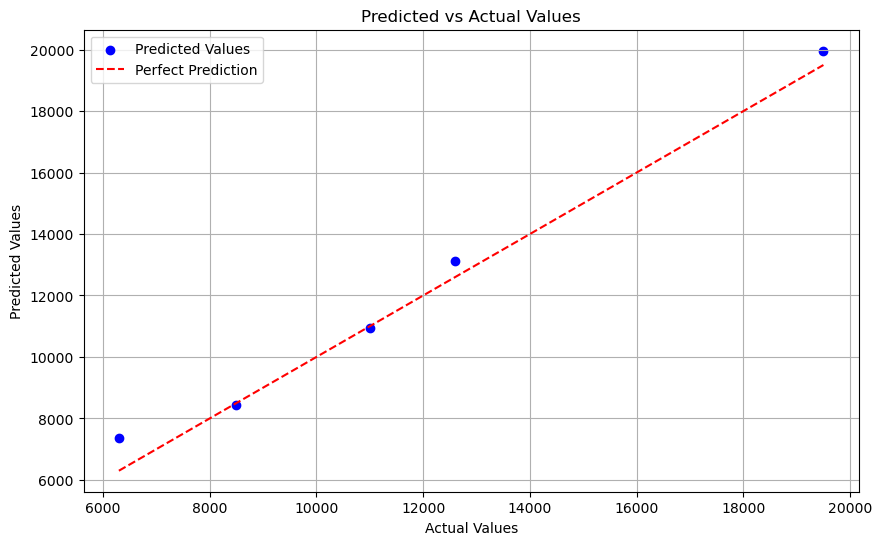

In [59]:
# Visualizing predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predictions, color='blue', label='Predicted Values')
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.grid()
plt.show()

### Key Findings

- **Visualization**:
  - A scatter plot was created to visualize the relationship between actual values and predicted values. The steps included:
    - **Scatter Plot**: Plotted actual values on the x-axis and predicted values on the y-axis, using blue dots to represent the predicted values.
    - **Perfect Prediction Line**: Added a red dashed line representing perfect predictions, where predicted values equal actual values. This line helps to assess how closely the predictions align with the actual values.

- **Plot Details**:
  - **Figure Size**: Set to **10x6** for better visibility.
  - **Labels**: 
    - x-axis labeled as "Actual Values"
    - y-axis labeled as "Predicted Values"
  - **Title**: "Predicted vs Actual Values"
  - **Legend**: Included to differentiate between predicted values and the perfect prediction line.
  - **Grid**: Enabled for easier interpretation of the plot.

### Outcome:
- The visualization provides a clear representation of model performance, allowing for quick assessment of how well the predicted values match the actual values. Points close to the red dashed line indicate accurate predictions, while those farther away indicate discrepancies.

# 6. Improving Predictions with Hyperparameter Tuning in XGBoost

In [62]:
!pip install xgboost

In [63]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Defining the model
model = xgb.XGBRegressor()

# Setting up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Setting up the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fitting the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predictions with the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Mean Absolute Error: 36.781297036267205


In [64]:
# Assuming new_data is your new input data
new_predictions = best_model.predict(new_data)
new_predictions

array([ 8498.766,  6305.412, 19502.47 , 10998.817, 12499.111],
      dtype=float32)

### Key Findings

- **Model Definition**:
  - An **XGBoost Regressor** model was defined for predicting values.

- **Parameter Grid Setup**:
  - A parameter grid was created for hyperparameter tuning, including:
    - **n_estimators**: [100, 200]
    - **max_depth**: [3, 5, 7]
    - **learning_rate**: [0.01, 0.1, 0.2]
    - **subsample**: [0.8, 1.0]

- **Grid Search Configuration**:
  - **GridSearchCV** was set up with:
    - **Cross-validation (cv)**: 5
    - **Scoring Metric**: Negative Mean Absolute Error (`neg_mean_absolute_error`)

- **Model Fitting**:
  - The grid search was fitted on the training data (`X_train`, `y_train`) to find the optimal parameters.

- **Best Parameters Found**:
  - The best parameters identified were:
    - `learning_rate`: **0.1**
    - `max_depth`: **5**
    - `n_estimators`: **200**
    - `subsample`: **1.0**

- **Predictions and Evaluation**:
  - The best model was used to make predictions on the test set (`X_test`).
  - The Mean Absolute Error (MAE) was calculated to evaluate model performance:
    - **Mean Absolute Error**: **36.78**

- **Predictions for New Data**:
  - Predictions were also made on a new dataset (`new_data`).
  - The model generated the following predictions:
  
    ```
    array([ 8498.766,  6305.412, 19502.47 , 10998.817, 12499.111],
          dtype=float32)
    ```

### Outcome:
- The tuning process successfully identified optimal hyperparameters, resulting in a model with a relatively low MAE, indicating good predictive performance. The predictions for new input data demonstrate the model's ability to generalize to unseen data.

# Comparison of Actual vs Predicted Values after Improving & Tuning

In [67]:
# New DataFrame to display actual vs predicted values
results_df_new = pd.DataFrame({
    'Actual Values': actual_values,
    'Predicted Values': new_predictions
})

# Calculate the difference
results_df_new['Difference'] = results_df_new['Actual Values'] - results_df_new['Predicted Values']

# Display the updated DataFrame with differences
print("\nComparison with Differences:")
print(results_df_new)


Comparison with Differences:
     Actual Values  Predicted Values  Difference
229           8499       8498.765625    0.234375
73            6299       6305.412109   -6.412109
352          19499      19502.470703   -3.470703
86           10999      10998.817383    0.182617
470          12599      12499.111328   99.888672


### Key Findings

### Comparison of Actual vs Predicted Values

- A new DataFrame was created to display actual values alongside predicted values and their differences.

### Outcome:
- This comparison highlights discrepancies between actual and predicted values, providing insight into the model's accuracy.

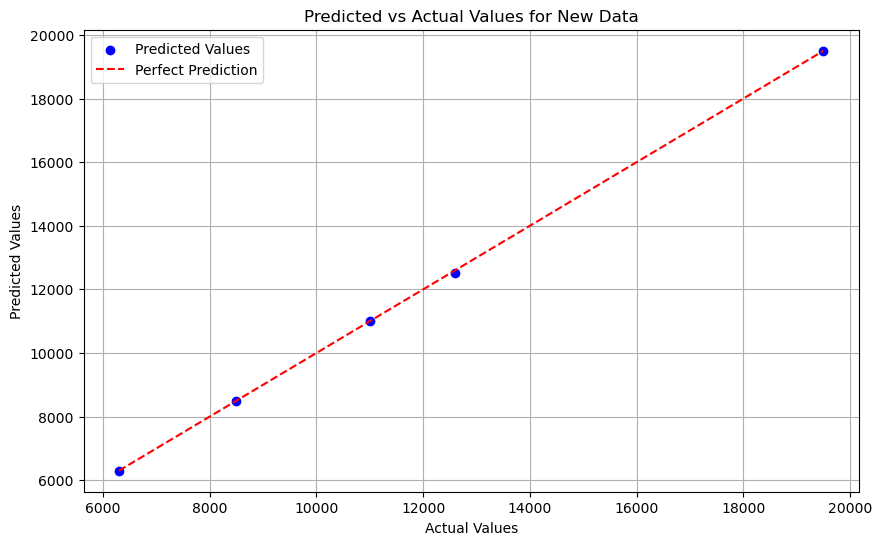

In [69]:
import matplotlib.pyplot as plt

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, new_predictions, color='blue', label='Predicted Values')
plt.plot([actual_values.min(), actual_values.max()], 
         [actual_values.min(), actual_values.max()], 
         'r--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for New Data')
plt.legend()
plt.grid()
plt.show()

# Key Findings:
- The predicted values are close to the actual values, but not perfectly aligned with the "Perfect Prediction" line, suggesting a small amount of error in the model's predictions.

**Methods Applied:**
- A predictive model was developed and applied to a new dataset.
- The model's predictions are plotted against the actual values to evaluate the model's performance.

**Outcome:**
- The model's predictions are very close to the actual values, but there is a small discrepancy between the predicted and actual values.
- Slight adjustments to the model may help improve the accuracy even further.

# 7. Feature Importance Analysis:

In [72]:
# Extract feature importances
feature_importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:\n")
print(importance_df.head(10))

Feature Importances:

                  Feature  Importance
7                   Prize    0.884032
4            Front Camera    0.114773
3             Rear Camera    0.001152
0                  Memory    0.000006
1                     RAM    0.000005
87   Model_POCO X4 Pro 5G    0.000003
235    Processor__MT6260A    0.000002
132  Model_Tecno Spark 9T    0.000002
59       Model_Micromax 3    0.000002
204         Brand_Oneplus    0.000002


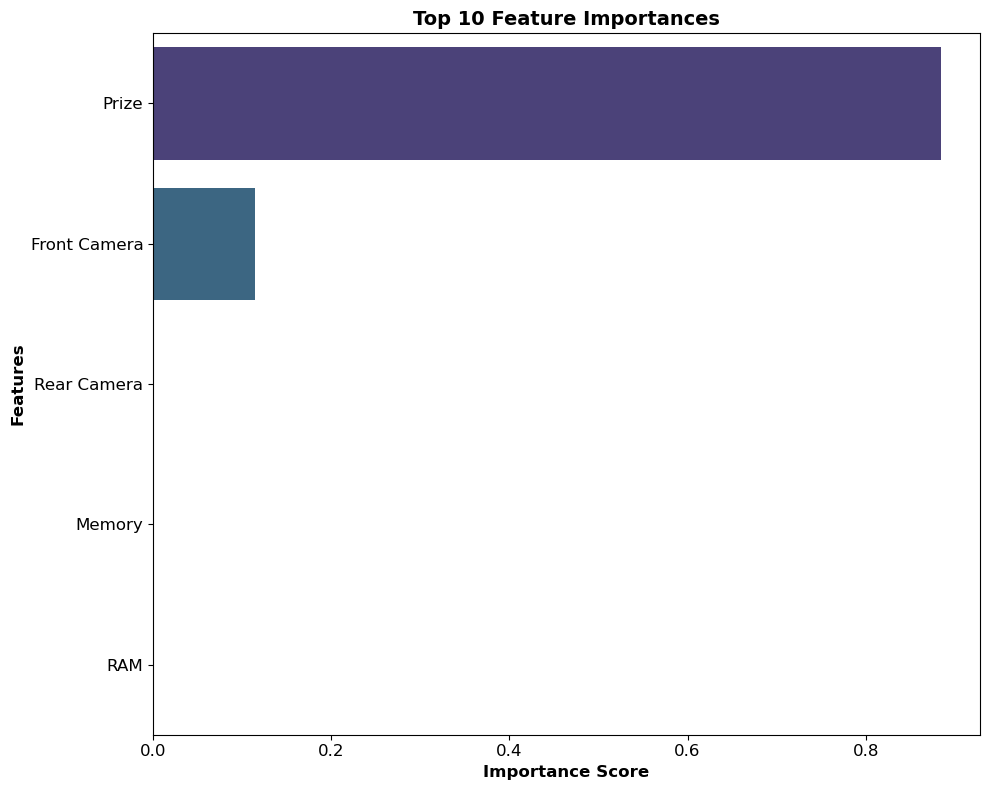

In [73]:
# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(5), palette = "viridis")
plt.title('Top 10 Feature Importances', fontsize = 14, fontweight ='bold')
plt.xlabel('Importance Score', fontsize = 12, fontweight ='bold')
plt.ylabel('Features', fontsize = 12, fontweight ='bold')

plt.xticks(fontsize =12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

# Key Findings:
- The most important feature for the model is the "Prize" of the product, with a high importance score.
- Other relatively important features include the front and rear camera specifications.
- The remaining features have much lower importance, meaning they contribute less to the model's predictions.

**Methods Applied:**
- The feature importances were extracted from the best predictive model.
- The features and their importance scores were organized into a table and sorted from highest to lowest importance.

**Outcome:**
- The top 10 most important features are displayed, giving insights into the key factors driving the model's predictions.
- This information can be used to further improve the model or focus on the most influential features.